In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
np.random.seed(666)
x=np.random.uniform(-3.0, 3.0, size=100)
X=x.reshape(-1,1)
y= 0.5*x**2 + x + 2.0 + np.random.normal(0.0, 1.0, size=100)

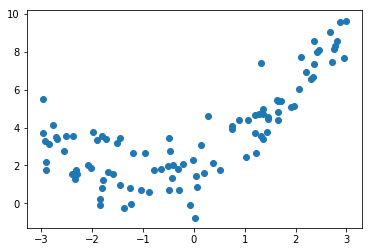

In [19]:
plt.scatter(x, y)
plt.show()

## 线性回归的学习曲线

In [20]:
from sklearn.linear_model import LinearRegression

In [4]:
lin_reg1=LinearRegression()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=10)

In [23]:
X_train.shape

(75, 1)

In [24]:
X_test.shape

(25, 1)

In [25]:
y_train.shape

(75,)

In [26]:
y_test.shape

(25,)

In [11]:
lin_reg1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_predict1=lin_reg1.predict(X_test)

In [27]:
train_error=[]
test_error=[]
for i in range(1, len(X_train)+1):
    lin_reg=LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict=lin_reg.predict(X_train[:i])
    train_error.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict=lin_reg.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_predict))

In [28]:
len(train_error)

75

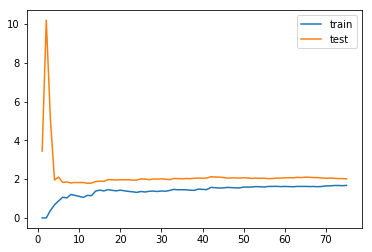

In [29]:
plt.plot([i for i in range(1,len(X_train)+1)], np.sqrt(train_error), label="train")
plt.plot([i for i in range(1,len(X_train)+1)], np.sqrt(test_error), label="test")
plt.legend()
plt.show()

## 可以看出
1. 测试误差高于训练误差
2. 测试误差在减小
3. 训练误差在增大
4. 训练误差和测试误差最终都趋向于平稳
5. 训练误差和测试误差都比较大，接近于2.0.能否减少误差呢？

### 用二次多项式拟合看看

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

def plot_learning_curve(reg, X_train, X_test, y_train, y_test):
    train_error=[]
    test_error=[]
    
    for i in range(1, len(X_train)+1):
        reg.fit(X_train[:i], y_train[:i])
        y_train_predict=reg.predict(X_train[:i])
        train_error.append(mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict=reg.predict(X_test)
        test_error.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1,len(X_train)+1)], np.sqrt(train_error), label='train')
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_error), label='test')
    plt.legend()
    plt.axis([0, len(X_train), 0.0, 10.0])
    plt.show()

## 线性回归学习曲线

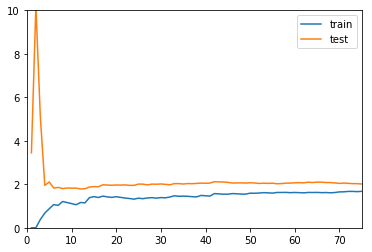

In [40]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

## 二次多项式学习曲线

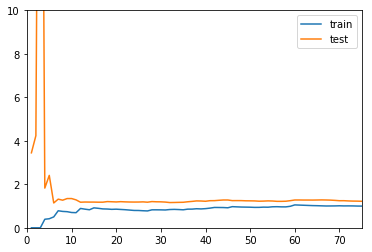

In [41]:
plot_learning_curve(PolynomialRegression(2),X_train, X_test, y_train, y_test)

## 可以看出，趋势与线性回归相似。但是，整体的误差都减小了。误差稳定在1.0左右。

## 20次多项式回归

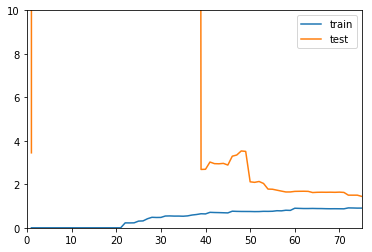

In [43]:
plot_learning_curve(PolynomialRegression(20), X_train, X_test, y_train, y_test)

## 可以看出，训练误差和测试误差的间距比较大